In [ ]:
pip install scikit-learn

In [3]:
import sklearn

In [4]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#usunięcie pustych - okazało się że nie było null
fare_values = dataset.loc[dataset['Fare'].notnull(), 'Fare'].values
print(fare_values.shape)

(891,)


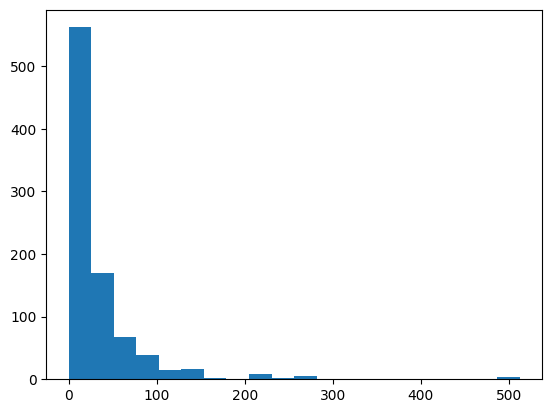

In [6]:
#histogram - najwięcej było tych z niskim fare
plt.hist(fare_values, bins=20)
plt.show()

In [7]:
#średnia
mean_fare = np.round(np.mean(fare_values))
print(mean_fare)

32.0


In [8]:
#mediana
median_fare = np.median(fare_values)
print(median_fare)

14.4542


In [9]:
#moda
mode_fare = stats.mode(fare_values)
print(mode_fare)

ModeResult(mode=np.float64(8.05), count=np.int64(43))


In [10]:
#kwartyle
q0 = np.quantile(fare_values, 0.0)
q1 = np.round(np.quantile(fare_values, 0.25))
q3 = np.round(np.quantile(fare_values, 0.75))
q4 = np.round(np.quantile(fare_values, 1.0))
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_fare}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 0.0
Q1: 8.0
Q2: 14.4542
Q3: 31.0
Q4: 512.0


In [11]:
#zakres
range_fare = max(fare_values) - min(fare_values)
print(range_fare)

512.3292


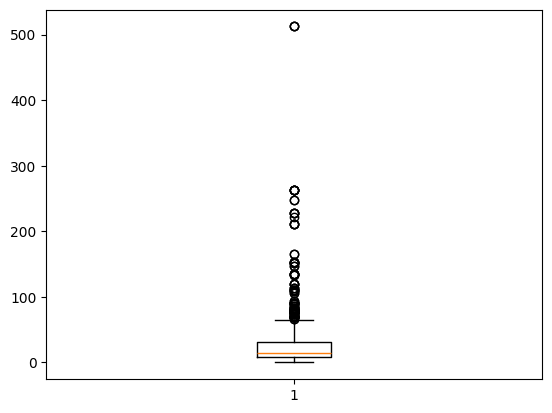

In [12]:
plt.boxplot(fare_values)
plt.show()

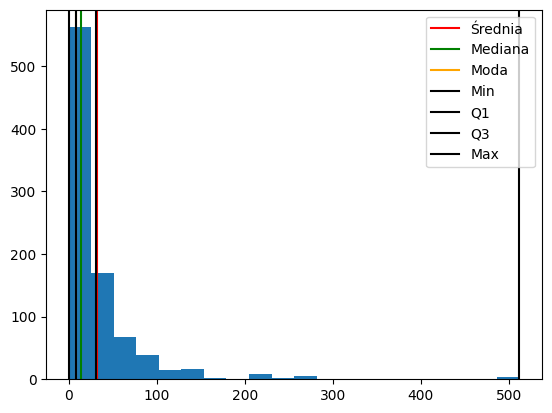

In [13]:
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

In [14]:
#wariancja
variance_fare = np.var(fare_values, ddof=1)
print(variance_fare)

2469.436845743116


In [15]:
#odchylenie standardowe
standard_deviation_fare = np.std(fare_values, ddof=1)
print(standard_deviation_fare)

49.6934285971809


Odp. Najwięcej było pasażerów z niskim fare (niektórzy nie płacili w ogóle, a najwyższa cena to ok. 512).
Wartość średnia to 32.0 a mediana to 14.4542. co jedynie potwierdza stwierdzenie o większej ilości niższych fare (prawoskośny rozkład).
75% wartości fare jest mniejszych niż 31.0.